In [6]:
pip install locationtagger

     |████████████████████████████████| 1.6 MB 5.3 MB/s            
     |████████████████████████████████| 211 kB 69.1 MB/s            
     |████████████████████████████████| 6.2 MB 36.9 MB/s            
     |████████████████████████████████| 10.1 MB 51.5 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 87 kB 7.1 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 81 kB 11.4 MB/s            
     |████████████████████████████████| 7.4 MB 66.9 MB/s            
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 663 kB 66.6 MB/s            
     |████████████████████████████████| 130 kB 57.7 MB/s            
     |████████████████████████████████| 9.9 MB 2.1 MB/s            
     |████████████████████████████████| 454 kB 48.8 MB/

In [12]:
pip install --upgrade nltk

     |████████████████████████████████| 1.5 MB 5.4 MB/s            
     |████████████████████████████████| 764 kB 52.0 MB/s            
  Attempting uninstall: regex
    Found existing installation: regex 2021.4.4
    Uninstalling regex-2021.4.4:
      Successfully uninstalled regex-2021.4.4
  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.4
    Uninstalling nltk-3.6.4:
      Successfully uninstalled nltk-3.6.4
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install newspaper3k

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import subprocess
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.types import StructType

import findspark
findspark.init()
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

import pyspark.sql.functions as sql_fun

In [3]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests, zipfile, io
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [369]:
# covid_df = spark.read.parquet("gs://msca-bdp-students-bucket/shared_data/bhadri/covid_tweets4_df.parquet/")

In [166]:
user_twt_pdf = pd.read_csv('gs://msca-bdp-test-1203/user_twt_pdf.csv')
user_twt_pdf.head()

/opt/conda/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3012: DtypeWarning: Columns (0,1,2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,x_user_name,x_user_scrname,x_user_desc,x_user_location,x_user_id,covid_twt_count,total_tweet_count,avg_retwt_count,followers_count
0,0,"Robert W Malone, MD",RWMaloneMD,"Inventor of mRNA vaccines and RNA as a drug, B...","Madison, VA",3.984488e+07,27532.0,8521.0,1333.550305,473202.0
1,1,Disclose.tv,disclosetv,Observing world events unfold in the grand the...,NaN,1.539249e+07,21596.0,3789.0,2459.135812,736174.0
2,2,Karan Menon,TheKaranMenon,"comedian from jersey, woke tiktok king, featur...","Holmdel, NJ",1.049540e+18,16271.0,223.0,11724.467826,23226.0
3,3,Chuck Callesto,ChuckCallesto,Father and Former Candidate for Florida's 3rd ...,"Florida, USA",4.765364e+09,13755.0,31375.0,2092.251472,285801.0
4,4,윤서⁷,btsinthemoment,for #bts 아포방포 translations — 🇰🇷🇦🇺 he / prince ...,speedy,1.333743e+18,13675.0,4549.0,6298.398245,94746.0


In [167]:
loc_df = user_twt_pdf[['x_user_scrname','x_user_location']]
loc_df.head(10)

,x_user_scrname,x_user_location
0,RWMaloneMD,"Madison, VA"
1,disclosetv,NaN
2,TheKaranMenon,"Holmdel, NJ"
3,ChuckCallesto,"Florida, USA"
4,btsinthemoment,speedy
5,DrEliDavid,NaN
6,MichaelPSenger,NaN
7,TroubledSamm,NaN
8,CBSNews,"New York, NY"
9,Breaking911,Nashville


In [8]:
loc_df.shape

(504577, 2)

In [168]:
loc_df = loc_df.dropna()
loc_df.shape

(258190, 2)

In [22]:
import nltk
import spacy
  
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 5.2 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 5.3 MB/s            
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [91]:
# import locationtagger
# nlp = spacy.load('en_core_web_sm')

# def id_location(text):
    
#     text = str(text)
#     text = text.lower()
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
#     place_entity = locationtagger.find_locations(text = text)
#     country = place_entity.countries
#     state = place_entity.regions
#     city = place_entity.cities
    
#     loc_list = [country,state, city]
    
#     if len(loc_list) == 0:
#         loc_list = ['unidentified location']
    
#     return loc_list


In [132]:
place = 'Florida, USA'
test = id_location(place)
test

[[], ['Florida'], ['Florida', 'Usa']]

In [249]:
cities = ['new york','los angeles','london','chicago','miami','dallas','philadelphia','houston','atlanta','washington','boston','phoenix','seattle','san francisco','detroit','san diego','minneapolis','tampa','denver','brooklyn','queens','riverside','baltimore','las vegas','portland','san antonio','st louis','sacramento','orlando','san jose','cleveland','pittsburgh','austin','cincinnati','kansas city','manhattan','indianapolis','columbus','charlotte','virginia beach','bronx','milwaukee','providence','jacksonville','birmingham','salt lake city','nashville','richmond','memphis','raleigh','new orleans','louisville','oklahoma city','bridgeport','buffalo','fort worth','hartford','tucson','omaha','el paso','honolulu','mcallen','leeds','hempstead','albuquerque','sarasota','dayton','rochester','fresno','allentown','tulsa','cape coral','concord','colorado springs','charleston','glasgow','springfield','grand rapids','mission viejo','albany','knoxville','bakersfield','ogden','baton rouge','bristol','akron','new haven','columbia','manchester','sheffield','mesa','liverpool','palm bay','provo','worcester','murrieta','edinburgh','greenville','brookhaven','wichita','toledo','staten island','des moines','leicester','long beach','port st lucie','denton','madison','reno','harrisburg','little rock','oakland','durham','winston-salem','bonita springs','indio','palm coast','chattanooga','spokane','syracuse','lancaster','arlington','stockton','poughkeepsie','augusta','boise','oxnard','scranton','modesto','kissimmee','aurora','youngstown','coventry','caerdydd','fayetteville','anaheim','pensacola','victorville','greensboro','corpus christi','fort wayne','belfast','santa ana','flint','islip','jackson','santa rosa','lansing','lexington','ann arbor','henderson','huntsville','mobile','fort collins','asheville','santa clarita','st paul','antioch','lakeland','newcastle','oyster bay','bradford','trenton','ipswich','lincoln','nottingham','anchorage','plano','irvine','bolton','davenport','rockford','newark','south bend','shreveport','round lake beach','sunderland','savannah','myrtle beach','chula vista','eugene','southampton','canton','plymouth','lubbock','reading','winter haven','salem','st petersburg','lafayette','laredo','jersey city','chandler','kingston upon hull','mckinney','scottsdale','killeen','tallahassee','peoria','wilmington','derby','westminster','montgomery','gilbert','glendale','north las vegas','wolverhampton','stoke-on-trent','portsmouth','abertawe','barnsley','chesapeake','barnstable','norfolk','fremont','kennewick','garland','irving','visalia','atlantic city','paradise','nashua','hialeah','york','north hempstead','evansville','avondale','brownsville','swindon','gulfport','appleton','bremerton','hickory','tacoma','san bernardino','college station','kalamazoo','thousand oaks','roanoke','fontana','moreno valley','luton','northampton','babylon','north port','fargo','green bay','spring valley','milton keynes','solihull','amarillo','santa barbara','gainesville','huntington','olympia','aberdeen','frisco','yonkers','norwich','huntington beach','deltona','tempe','overland park','grand prairie','peterborough','sunrise manor','waco','salinas','waterbury','clarksville','cedar rapids','bournemouth','sioux falls','basildon','ontario','hagerstown','erie','vancouver','nampa','spartanburg','gastonia','fort lauderdale','lorain','murfreesboro','high point','newport news','rancho cucamonga','hemet','santa cruz','danbury','oceanside','elk grove','pembroke pines','vallejo','garden grove','enterprise','medford','cary','marysville','corona','ocala','fredericksburg','warrington','huddersfield','southend','champaign','alexandria','hayward','lakewood','frederick','lake charles','odessa','tuscaloosa','warner robins','palmdale','hollywood','midland','leesburg','port arthur','muskegon','macon','sunnyvale','oxford','pomona','escondido','pasadena','new bedford','fairfield','naperville','dundee','bellevue','binghamton','elkhart','topeka','joliet','west bromwich','beaumont','newport','gloucester','paterson','merced','poole','pueblo','tyler','torrance','birkenhead','yuma','telford','metairie','preston','surprise','athens','roseville','thornton','miramar','mesquite','middlesbrough','olathe','santa maria','houma','blackpool','carrollton','grand junction','orange','fullerton','greeley','las cruces','panama city','harlingen','ramapo','west valley city','hampton','brighton','sale','warren','mauldin','bloomington','coral springs','round rock','yakima','sterling heights','kent','burlington','bellingham','santa clara','racine','stamford','elizabeth','johnson city','lynchburg','simi valley','amherst','fort smith','kenosha','norman','south lyon','boulder','exeter','cambridge','abilene','lehigh acres','pearland','colchester','berkeley','richardson','redding','arvada','east los angeles','st george','billings','yuba city','high wycombe','gateshead','leominster','kingsport','duluth','rock hill','slough','gilroy','sugar land','texas city','iowa city','blackburn','saginaw','chico','dover','clearwater','coeur dalene','seaside','independence','smithtown','west jordan','cheltenham','brandon','el monte','north charleston','carlsbad','chelmsford','st cloud','temecula','clovis','meridian','the woodlands','costa mesa','monroe','utica','pompano beach','west palm beach','waterloo','everett','el centro','santa fe','downey','spring hill','lowell','centennial','elgin','broken arrow','rochdale','miami gardens','doncaster','bend','rotherham','jurupa valley','sandy springs','gresham','lewisville','hillsboro','worthing','san buenaventura','pottstown','inglewood','maidstone','league city','eau claire','basingstoke','turlock','temple','crawley','sioux city','salisbury','davie','daly city','highlands ranch','allen','west covina','sparks','wichita falls','san mateo','gillingham','norwalk','salford','wigan','rialto','manteca','arden-arcade','el cajon','saint helens','burbank','longmont','renton','vista','logan','eastbourne','prescott valley','vacaville','edinburg','carmel','spokane valley','san angelo','la crosse','edison','idaho falls','holland','charlottesville','longview','woodbridge','tracy','boca raton','lees summit','wakefield','rio rancho','south fulton','beaverton','lawrence','bismarck','orem','middletown','san tan valley','san marcos','oldham','sandy','federal way','greece','mandeville','hesperia','brockton','compton','rayleigh','riverview','fishers','sunrise','bowling green','hemel hempstead','bath','roswell','menifee','plantation','quincy','chino','lynn','edmond','hanford','dearborn','livonia','south gate','vineland','florence','slidell','lawton','kirkland','missoula','auburn','wimbledon','rapid city','terre haute','bedford','darlington','toms river','suffolk','hove','blacksburg','southport','mount pleasant','carson','greenburgh','conroe','alafaya','hastings','livermore','germantown','santa monica','watford','new braunfels','stevenage','fall river','miami beach','hartlepool','san leandro','ofallon','newton','grimsby','halifax','muncie','citrus heights','state college','chester','hamilton','town n country','decatur','fort myers','goodyear','dalton','nuneaton','clarkstown','cheektowaga','bryan','waukegan','hawthorne','anderson','redwood city','hoover','lake forest','napa','whittier','clifton','derry','largo','johns creek','newport beach','mission','milpitas','troy','madera','joplin','chino hills','alhambra','aylesbury','franklin','melbourne','port huron','upper darby','colonie','mountain view','stockton-on-tees','zephyrhills','st augustine','saint albans','harlow','burnley','flagstaff','redditch','buena park','pleasanton','silver spring','atascocita','westland','cranston','somerville','folsom','springdale','deerfield beach','warwick','cicero','farmington hills','batley','williamsburg','brooklyn park','hattiesburg','scunthorpe','valdosta','buckeye','georgetown','cheyenne','cedar park','dudley','the villages','kokomo','tustin','perris','st joseph','flower mound','pharr','pine hills','alton','loveland','bury','eastleigh','boynton beach','new rochelle','jonesboro','lebanon','parma','layton','elizabethtown','texarkana','alameda','mansfield','kankakee','watsonville','porterville','bracknell','baytown','upland','guildford','davis','camarillo','chatham','south jordan','battle creek','bellflower','paisley','weston-super-mare','san ramon','lake jackson','bethlehem','wyoming','oshkosh','hammond','waldorf','missouri city','pasco','carlisle','wheeling','brick','south shields','kendall','baldwin park','east kilbride','rancho cordova','newcastle under lyme','burton upon trent','conway','gary','altoona','lodi','arlington heights','bolingbrook','rochester hills','winchester','framingham','hilton head island','centreville','union city','owensboro','tamworth','wausau','harrogate','camden','anniston','evanston','apple valley','crewe','schaumburg','pocatello','woodbury','southfield','ellicott city','dale city','maple grove','pittsburg','new britain','morgantown','dothan','harrisonburg','wenatchee','waukesha','pawtucket','redmond','lauderhill','shrewsbury','gosport','sumter','redlands','daphne','lisburn','mount vernon','weston','st charles','cherry hill','lowestoft','janesville','sherman','north richland hills','rugby','stafford','broomfield','el paso de robles','casas adobes','walnut creek','poinciana','lynwood','glen burnie','lehi','passaic','homestead','west bend','delray beach','sheboygan','lake elsinore','daytona beach','los lunas','lima','rocklin','rogers','castle rock','tynemouth','hanover','bossier city','dubuque','rockville','victoria','saratoga springs','gaithersburg','ames','west des moines','south san francisco','cannock','yorba linda','casper','walsall','ashford','palatine','corvallis','ankeny','rowlett','lakeville','alpharetta','dekalb','petaluma','grays','godalming','redondo beach','tamarac','walton upon thames','laguna niguel','eagan','kenner','bay city','gravesend','north little rock','sammamish','shawnee','jupiter','old bridge','doral','florence-graham','carbondale','blaine','weirton','tulare',
          'pflugerville','palo alto','schenectady','great falls','michigan city','farnborough','bayonne','eden prairie','port orange','dublin','grand forks','noblesville','san clemente','brentwood','carmichael','paignton','east orange','eastvale','chapel hill','rocky mount','haverhill','bognor regis','beloit','maidenhead','merthyr tudful','glens falls','stourbridge','fairbanks','bethesda','johnstown','west hartford','hereford','dundalk','castro valley','coon rapids','elmira','dewsbury','mankato','north miami','woking','encinitas','skokie','leander','greenwich','parkersburg','waltham','port charlotte','palm harbor','san luis obispo','sebring','council bluffs','moore','pico rivera','casa grande','monessen','montebello','runcorn','scarborough','north bergen','wrecsam','rome','the hammocks','widnes','millcreek','sanford','national city','burnsville','coconut creek','margate','morristown','reston','ellesmere port','bangor','hamden','spring','gadsden','taylor','novi','marietta','hot springs','woodland','fountainebleau','la habra','taunton','malden','bensalem','south whittier','commerce city','wallasey','south hill','loughborough','west allis','taylorsville','monterey park','greenwood','bartlett','bradenton','pontiac','staunton','meriden','clay','gardena','apex','royal oak','cupertino','la mesa','benton harbor','brookline','lower merion','st clair shores','des plaines','lewiston','carson city','bowie','caldwell','san rafael','littlehampton','union','hamburg','richland','st peters','wesley chapel','halesowen','hendersonville','white plains','huntersville','santee','jefferson city','beckley','arcadia','titusville','cartersville','walla walla','orland park','towson','royal tunbridge wells','weymouth','parker','palm beach gardens','bozeman','east stroudsburg','huntington park','midwest city','bebington','goldsboro','aldershot','euless','shoreline','piscataway','lake havasu city','smyrna','macclesfield','cape girardeau','kettering','tamiami','kendale lakes','grants pass','blue springs','southaven','tinley park','royal leamington spa','diamond bar','pittsfield','eagle pass','new brunswick','lenexa','hazleton','twin falls','kidderminster','novato','tigard','abington','highland','fountain valley','dearborn heights','grapevine','fond du lac','hacienda heights','ithaca','chicopee','oak lawn','cathedral city','corby','delano','bentonville','stonecrest','canterbury','colton','kingston','west haven','normal','berwyn','milford','aloha','christchurch','arroyo grande','irvington','minnetonka','rosemead','paramount','wayne','yucaipa','brunswick','williamsport','elyria','mount prospect','pinellas park','west sacramento','apopka','keighley','grand island','palm desert','milford city','watertown','little elm','dunfermline','chambersburg','revere','peabody','wylie','beaufort','aspen hill','desoto','helena','edina','wheaton','west new york','hoboken','lacey','summerville','altrincham','parsippany-troy hills','oak park','maricopa','stratford','lompoc','howell','kentwood','levittown','crosby','sierra vista','glendora','barri','burien','willenhall','bootle','perth amboy','herriman','folkestone','farmington','new bern','placentia','hinesville','collierville','west lafayette','florissant','hoffman estates','cumbernauld','esher','queen creek','aliso viejo','kannapolis','livingston','methuen town','sahuarita','clacton-on-sea','traverse city','severn','catalina foothills','galveston','country club','cookeville','mishawaka','rowland heights','plainfield','bullhead city','irondequoit','stillwater','east hartford','forney','azusa','orangetown','north bethesda','cerritos','ashburn','bloomsburg','morehead city','coral gables','enid','oroville','wilson','portage','minot','pen-y-bont ar ogwr','dunwoody','poway','haverford','bloomfield','san jacinto','cuyahoga falls','lower paxton','downers grove','reedley','marana','cypress','hollister','murray','pascagoula','tuckahoe','ceres','st louis park','rio grande city','draper','cwmbran','palm springs','paducah','findlay','university','bel air south','antelope','kyle','welwyn garden city','ocoee','burleson','la mirada','smethwick','farmers branch','east lansing','uniontown','jeffersonville','winder','wauwatosa','kirkcaldy','littleton','cumberland','cedar hill','rancho santa margarita','east brunswick','beavercreek','niagara falls','mclean','north highlands','east providence','florin','east honolulu','chesterfield','covina','perth','bothell','west orange','glenview','inverness','mentor','keller','danville','stretford','banbury','ayr','elmhurst','wokingham','new philadelphia','perinton','sandusky','rye','el dorado hills','salina','euclid','kingman','kilmarnock','weatherford','roseburg','biloxi','leavenworth','fort pierce','winter garden','oro valley','morgan hill','potomac','pinehurst','neath','rockwall','coachella','wake forest','pearl city','tupelo','south brunswick','west seneca','hinckley','attleboro','pine bluff','oakland park','ashton','marion','evesham','hilo','lufkin','altadena','manitowoc','lake ridge','selma','strongsville','wallingford','webster','bridgewater','riverton','the colony','urbandale','lombard','prescott','north lauderdale','eureka','hackensack','sayreville','enfield','altamonte springs','del rio','cleveland heights','bountiful','coatbridge','desert hot springs','peachtree corners','haltom city','southington','ormond beach','cutler bay','adrian','goose creek','moorhead','westfield','henrietta','annandale','rohnert park','brea','klamath falls','billerica','channelview','north miami beach','kingston upon thames','whitney','freeport','centralia','gallatin','stevens point','san bruno','burke','kings lynn','north fort myers','egg harbor','hicksville','west babylon','edmonds','apache junction','oakley','hutchinson','cortlandt','linden','puyallup','urbana','beverly','statesboro','hobbs','mcminnville','schertz','bell gardens','greenock','oviedo','odenton','grove city','campbell','wentzville','north brunswick','woonsocket','la quinta','weslaco','zanesville','newnan','shakopee','catonsville','rancho palos verdes','mableton','mount laurel','coppell','linton hall','moline','penn hills','delaware','shelton','greenacres','westerville','manassas','newbury','kearny','los banos','hempfield','spanish fork','belleville','maplewood','wilkes-barre','kingswood','pottsville','bury saint edmunds','bluefield','fitchburg','cedar falls','buffalo grove','jamestown','woodlawn','teaneck','ramsgate','clarksburg','royal palm beach','covington','coram','friendswood','indian trail','woburn','the acreage','holyoke','montclair','south valley','torrington','cedar city','marlboro','san gabriel','hallandale beach','crystal lake','calexico','lake oswego','muskogee','romeoville','plant city','keizer','manalapan','new berlin','chelsea','la puente','roy','security-widefield','marlborough','milton',
    'aberdare','hillsborough','issaquah','waipahu','essex','bartlesville','streamwood','annapolis','carol stream','asheboro','culver city','kalispell','lynnwood','mooresville','brookfield','crestview','horizon west','clinton','moses lake','new castle','olive branch','sun city','frankfort','winslow','groton','northglenn','duncanville','great yarmouth','tonbridge','hurst','clermont','fort lee','pacifica','lake worth','glenrothes','kendall west','chorley','land o lakes','eagle mountain','herne bay','reynoldsburg','rosenberg','martinez','pleasant grove','la presa','bishops stortford','severna park','huber heights','stanton','east meadow','menomonee falls','granbury','waxahachie','valrico','mission bend','holly springs','butler','albertville','egypt lake-leto','ossining','stirling','cottage grove','kailua','st marys','bletchley','mechanicsville','richmond west','cleburne','valley stream','hanover park','oswego','airdrie','navarre','oregon city','winter springs','parkland','pahrump','port talbot','carpentersville','penfield','wildomar','greenfield','braintree','rock island','south miami heights','evans','haverstraw','west fargo','llanelli','mount juliet','san juan','oakton','aventura','owasso','commack','park ridge','foley','new albany','benton','clifton park','bettendorf','yorktown','dunedin','hilliard','merritt island','phenix city','addison','west hollywood','oakville','tucker','moorpark','richfield','monrovia','kearns','oak creek','lincoln park','claremont','post falls','peachtree city','lauderdale lakes','natick','french valley','galloway','ewing','gillette','tooele','trumbull','prattville','woodburn','watertown town','calumet city','san juan capistrano','foothill farms','falkirk','elmont','andover','temple city','cooper city','el mirage','meadow woods','lagrange','la vergne','guilderland','carrollwood','junction city','inver grove heights','pennsauken','chillum','randallstown','bell','gahanna','riviera beach','accrington','wildwood','upper arlington','westmont','bridlington','oak harbor','olney','manhattan beach','new city','owings mills','la porte','freehold','englewood','east point','ewell','deland','pleasant hill','orangevale','merrillville','stow','buenaventura lakes','san luis','morecambe','oildale','calhoun','leawood','menlo park','sun prairie','dakota ridge','arcata','grantham','glastonbury','lockport','pullman','exmouth','boardman','nacogdoches','kearney','vestavia hills','north ridgeville','socorro','randolph','norristown','montgomery village','hitchin','firestone','goshen','butte','russellville','dartmouth','grass valley','university city','midvale','golden glades','kennesaw','adelanto','ken caryl','university place','douglasville','laramie','lake stevens','foster city','valparaiso','fairborn','estero','mason','cottonwood heights','kaneohe','sonoma','lichfield','beverly hills','galesburg','warsaw','san dimas','glendale heights','dana point','riverhead','falls','midlothian','alamogordo','alabaster','pikesville','fair oaks','deer park','woodridge','bridgeton','greer','springville','copperas cove','american fork','matthews','abingdon','trowbridge','woodstock','eastchester','northbrook','west little river','fair lawn','huntington station','fairmont','ridgecrest','lower makefield','motherwell','massillon','spanaway','north providence','starkville','warminster','clarence','harker heights','elk grove village','kaysville','lawndale','dumfries','southlake','ferry pass','savage','brighouse','bethel park','wigston magna','mount lebanon','princeton','dania beach','lower macungie','windsor','east lake','college park','coos bay','smithfield','clearfield','liberty','eastpointe','franklin square','pekin','westlake','uniondale','chillicothe','juneau','la verne','prairieville','placerville','bel air north','manlius','redan','martinsville','pueblo west','radnor','garfield','fallbrook','willingboro','ecclesfield','wisbech','hopkinsville','south riding','centereach','milledgeville','parkville','sherwood','garner','key west','dracut','miami lakes','petersburg','north olmsted','kahului','wheat ridge','fruit cove','cibolo','alliance','banning','laguna hills','central islip','rutherglen','saint neots','falmouth','ridley','orcutt','naugatuck','eldersburg','tewksbury','mundelein','san pablo','rexburg','needham','chichester','nogales','nicholasville','goleta','opelika','newburgh','algonquin','marrero','burlingame','cranberry','aiken','north andover','lawrenceville','beverley','winter park','lake magdalene','granger','wooster','fountain','brooklyn center','south kingstown','kerrville','barstow','ross','crown point','city of orange','lakeside','deptford','north huntingdon','gurnee','orangeburg','holladay','fuquay-varina','chamblee','wishaw','carney','peru','sterling','upper merion','cornelius','north tonawanda','long branch','harpenden','newington','santa paula','los gatos','whitstable','south lake tahoe','san carlos','saratoga','los altos','ballwin','atascadero','north royalton','somerset','seguin','hampden','fortuna foothills','milford mill','stockbridge','east liverpool','rahway','madison heights','williston','bay shore','eagle','westchester','maryville','walnut','mamaroneck','suisun city','garden city','west falls church','north chicago','winona','rotterdam','drexel heights','ukiah','atwater','golden gate','highland park','hermiston','orchard park','tredyffrin','pittsford','central','east lake-orient park','chicago heights','east palo alto','johnston','norwood','east fishkill','glenville','bromsgrove','vernon','newberg','voorhees','lewes','north attleborough','port chester','oak ridge','cheshire','crofton','laplace','cambuslang','seatac','raytown','paragould','graham','southgate','west warwick','harrison','niles','fernandina beach','mount olive','big spring','bella vista','morrisville','stanford le hope','casselberry','wellesley','east haven','plattsburgh','wasco','hertford','south laurel','fleming island','belle glade','stoughton','lake in the hills','agawam','wallkill','shirley','burton','chili','geneva','schererville','west springfield','austintown','nutley','mccandless','shamokin','new iberia','gates','vineyard','zionsville','vestal','short pump','lumberton','perry hall','benicia','oakleaf plantation','rockledge','saugus','monterey','converse','granite city','bearsden','yukon','sonora','shaler','branford','melrose','westport','billericay','mehlville','wisconsin rapids','galt','hutto','bixby','drexel hill','hobart','west windsor','oakdale','sunbury','summerlin south','new smyrna beach','tualatin','forest hills','fridley','newtown','east chicago','kirkwood','sanger','morgan city','ramsey','ruston','jeffersontown','glen ellyn','isla vista','canon city','monticello','ashtabula','temescal valley','mint hill','danvers','whitehall','neptune','mililani town','statesville','jarrow','witney','gloversville','gladstone','queensbury','garfield heights','stratford-upon-avon','imperial beach','seneca','bayonet point','millville','monroeville','st helens','bergenfield','new windsor','ladera ranch','horn lake','east windsor','prior lake','huntley','maple valley','easton','oak forest','pemberton','glen cove','indiana','shoreview','dodge city','colleyville','wilmette','plum','bernards','mchenry','waterville','thetford','shaker heights','citrus park','new milford','reisterstown','brownsburg','chaska','aldridge','ilchester','maywood','shelby','maryland heights','seaford','magna','xenia','belmont','allen park','mason city','new lenox','hanahan','kinston','searcy','new london','west islip','west chicago','kiryas joel','lemon grove','lindenhurst','springettsbury','mcdonough','west linn','cortland','lemoore','alvin','ocean','waynesboro','marshalltown','wappinger','west whittier-los nietos','leisure city','lower providence','thomasville','temple terrace','university park','norco','newton mearns','immokalee','vernon hills','pearl','bethany','marquette','horsham','sedalia','bessemer','plainview','batavia','west milford','chanhassen','east grinstead','cabot','vicksburg','upper dublin','clydebank','brawley','neenah','snoqualmie','hercules','mahwah','lake city','paramus','okeechobee','north kingstown','soledad','wethersfield','muscatine','boone','moscow','cliffside park','sebastian','northport','natchez','twentynine palms','holt','burntwood','east st louis','sachse','paris','haines city','cave spring','merrimack','superior','west odessa','medina','barberton','espanola','londonderry','dix hills','rock springs','south windsor','mercer island','heber','white bear lake','laurel','marshfield','shenley brook end','holbrook','bay point','lochearn','green','wall','cloverleaf','owatonna','coulsdon','pooler','ewa gentry','farnham','south salt lake','tarpon springs','edgewood','san lorenzo','bluffton','sevierville','forest grove','sun city west','south portland','ruskin','denison','el cerrito','keystone','moon','bishop auckland','longbridge','coral terrace','claremore','homewood','upminster','hudson','columbine','south pasadena','canyon lake','kingsville','forest city','bainbridge island','dedham','caledonia','de witt','champlin','edwardsville','south bradenton','fairland','elk river','rosemount','fountain hills','rhyl','belvidere','middle river','walpole','muskego','hazelwood','scottsbluff','rockaway','ridgewood','yucca valley','ridgefield','branson','whitehaven','balch springs','rainham','timberwood park','de pere','socastee','susquehanna','terrytown','wilsonville','clayton','brookings','riverbank','north laurel','walker','wyandotte','grandview','forest lake','middleborough','chesapeake beach','palm city','simsbury','swatara','south elgin','auburn hills','baldwin','north tustin','melrose park','ardmore','palm tree','norton shores','kernersville','windham','sugar hill','herndon','emporia','prosper','rockville centre','palmetto bay','suitland','avon lake','lathrop','loma linda','watauga','homer glen','tifton','dinuba','east hempfield','bloomingdale','ashland','opelousas','camas','harvey','trotwood','west memphis','collinsville','mequon','ellensburg','ottumwa','chantilly','shelbyville','westford','orchards','san fernando','peekskill','port angeles','mill creek east','sun city center','inkster','ponca city','camillus','tysons','west melbourne','faribault','san benito','fort washington','lincolnton','halfmoon','simpsonville','scotch plains','waverly','baileys crossroads','fishkill','okemos','upper macungie','upper moreland','ridgeland','plymstock','elmwood park','north platte','charles town','waukee','south plainfield','wadsworth','tumwater','fairfax','cranford','candler-mcafee','venice','rickmansworth','wright','littleover','arbroath','lincolnia','westchase','upper providence','edgewater','north potomac','pelham','corsicana','seal beach','fort dodge','dunkirk','calabasas','chalmette','oadby','north augusta','palm river-clair mel','mount pocono','marple','farragut','jenks','palatka','huntingdon','coronado','north haven','valinda','centerville','droylsden','van buren','greeneville','waycross','half moon bay','hingham','belton','jacksonville beach','acton','north lynnwood','ilion','rosemont','seymour','newton abbot','madisonville','romulus','cudahy','copiague','winter gardens','leland','bishopbriggs','rolling meadows','wekiwa springs','northdale','fort hood','benbrook','zion','montrose','hialeah gardens','carteret','arnold','avon','west puente valley','loves park','yarmouth','vero beach south','lisle','greenbelt','stoneham','granite bay','dickinson','kenmore','allison park','monsey','plainsboro','rockingham','west goshen','frederickson','willoughby','mustang','roxbury','patterson','bathgate','gallup','radcliff','market harborough','west rancho dominguez','blue island','crystal','pace','marshall','laguna beach','webster groves','acworth','griffin','willowbrook','morton grove','lysander','keene','marina','solon','barnegat','new brighton','mandan','elizabeth city','harriman','ives estates','stratton saint margaret','fairhope','cottage lake','machesney park','braidwood','hurricane','onondaga','wareham','trussville','corcoran','meadville','landover','happy valley','east peoria','westerly','hopewell','fort walton beach','nixa','munster','christiansburg','anthem','roselle','the crossings','formby','warrensburg','kihei','millbrae','florida ridge','silver firs','dolton','duncan','brent','northfield','sequim','south ockendon','lyndhurst','prairie village','kuna','coralville','fort mill','morris','niskayuna','rose hill','litherland','lutz','taylors','roanoke rapids','guilford','raymore','ensley','mukwonago','east patchogue','pickerington','arvin','southold','raritan','lino lakes','corinth','naples','west carson','maple heights','unity','lealman','gardner','union hill-novelty hill','peters','hayesville','siloam springs','east hampton','piqua','fish hawk','hillside','port hueneme','summit','secaucus','golden valley','jasmine estates','renfrew','camp springs','new hartford','lennox','sheldon','sunny isles beach','rancho san diego','yate','massapequa','darien','shafter','eastmont','katy','brownwood','del city','north bay shore','silverdale','kapolei','allendale','lower','perrysburg','lewistown','hamtramck','truro','bellview','biddeford','somers','mcnair','villa park','fernley','elkridge','mukilteo','east pennsboro','atoka','prichard','le ray','hays','kirkintilloch','montville','easley','brambleton','darton','palmer','mountlake terrace','ramona','minster','owosso','king of prussia','debary','eustis','south euclid','south holland','palm valley','ludlow','north plainfield','sapulpa','duarte','battle ground','stephenville','amsterdam','park forest','fort atkinson','hazel dell','carrboro','bardstown','east ridge','elko','gaffney','sun valley','west deptford','sidney','bonney lake','martha lake','little egg harbor','bothell west','ballenger creek','rolla','omagh','west pensacola','cockeysville','jefferson','pleasant prairie','woodlesford','sweetwater','st andrews','milwaukie','bryant','salmon creek','hyde park','kill devil hills','north salt lake','apollo beach','cornelia','suwanee','new hope','wade hampton','green valley','mill creek','universal city','lorton','clemmons','rosamond','bear','musselburgh','dyersburg','manor','oneida','hunters creek','holiday','penzance','dixon','leek','golden','olean','leigh-on-sea','grayslake','north bellmore','palisades park','south milwaukee','havelock','lake ronkonkoma','east moline','yorkville','maesteg','logansport','north ogden','south el monte','dumbarton','lynn haven','ferguson','willmar','alice','swansboro','marblehead','murphy','culpeper','berlin','ozark','american canyon','papillion','moorestown','the dalles','columbia heights','barre','amherst center','newmarket','crest hill','punta gorda','neabsco','poplar bluff','ennis','coolbaugh','tukwila','prunedale','lomita','payson','mountain brook','bellshill','glassboro','bayshore gardens','sandwich','new canaan','ely','shenandoah','buckingham','linda','muhlenberg','agoura hills','east hemet','libertyville','durango','east northport','howard','monmouth','ypsilanti','rocky hill','mokena','pleasantville','affton','millburn','bartow','mead valley','miamisburg','dorchester','merrick','escanaba','selden','bayou cane','mililani mauka','snellville','sulphur','south st paul','oregon','middleton','ferndale','west chester','forest park','la canada flintridge','hauppauge','safford','antrim','rocky river','south san jose hills','el reno','saco','fairwood','west st paul','valley','orinda','cullman','alamo','sand springs','vernal','laurinburg','painesville','lake zurich','west hempstead','upper allen','hazlet','rosedale','ottawa','bourne','meadowbrook','casa de oro-mount helix','lake shore','parma heights','south whitehall','old jamestown','makakilo','tahlequah','brockport','norton','rockport','upper st clair','franconia','front royal','west mifflin','la crescenta-montrose','somerton','blythe','southbury','bethel','horizon city','davyhulme','eloy','brigham city','murrysville','brainerd','rio rico','central falls','haslett','tullahoma','anna','goole','south burlington','north liberty','schofield barracks','lake butler','vincennes','sienna plantation','holtsville','abbeville','bourbonnais','syosset','lynbrook','matteson','angleton','lower allen','castaic','canby','wendell','laconia','great linford','silverthorne','altamont','hermosa beach','sheridan','durant','sylvania','corning','arbutus','white oak','peterhead','pinole','erlanger','sherrelwood','mineola','whitpain','stevenson ranch','liberal','cameron park','pinecrest','horseheads','evergreen park','lower southampton','tiffin','sudbury','mount airy','broadview heights','frimley','cirencester','westbrook','saugerties','holden','monkseaton','red bluff','westborough','fox crossing','mckeesport','limerick','stroud','bellaire','southbourne','onalaska','waterford','uwchlan','springboro','sartell','badger','five corners','mcalester','la follette','terrell','natchitoches','twinsburg','central point','seminole','coldwater','owego','west manchester','ware','st john','point pleasant','grafton','cimarron hills','east lyme','scituate','sparta','alsip','port isabel','bellwood','marinette','north valley stream','broughty ferry','ansonia','west whiteland','deerfield','maple shade','creve coeur','seabrook','eastwood','berea','cocoa','moultrie','avenel','sudley','anacortes','ebbw vale','winthrop','rancho mirage','sharon','gibsonton','lynden','north massapequa','gautier','mayfield heights','breaux bridge','hopkins','wilton','defiance','stonington','iron mountain','altus','bryn mawr-skyway','uvalde','brushy creek','north amityville','brook park','pembroke','middle','wallingford center','sunnyside','almondbury','towamencin','world golf village','sycamore','franklin farm','chowchilla','ronkonkoma','rutherford','hadleigh','merrifield','newburyport','idylwood','kilgore','radford','palestine','whitestown','crawfordsville','fulwood','boerne','hyattsville','lake placid','st michael','east goshen','maumelle','iselin','menomonie','southeast','wheatfield','rutland','imperial','otsego','st matthews','berkhampstead','round lake','oxon hill','beeville','north wilkesboro','goffstown','north aurora','lithia springs','bon air','bensenville','eastlake','beaver dam','safety harbor','mattoon','macomb','north druid hills','west columbia','sunland park','estelle','mountain house','san carlos park','rockland','zachary','kingsland','marco island','ingleside','whitemarsh','wantagh','lenoir','burke centre',
    'perry','hannibal','menasha','oak grove','scarsdale','brenham','ocean springs','woodcrest','white settlement','five forks','knightdale','ada','crossville','beltsville','colonia','tonypandy','portchester','moraga','midway','steubenville','tavares','belgrade','foxborough','takoma park','lackawanna','melville','wailuku','buckhall','el dorado','south hadley','harwich','greene','valle vista','cedar mill','albert lea','maitland','fern down','gretna','hatfield','hinsdale','santa fe springs','franklin park','bethpage','east massapequa','plainville','barrhead','blooming grove','kirksville','nipomo','hopkinton','gorham','butner','tillmans corner','upper grand lagoon','anoka','pinewood','amesbury','bonnyrigg','tallmadge','kingstowne','nanuet','dumont','maryland city','shorewood','vero beach','clemson','country walk','spanish lake','lake mary','manassas park','woodmere','lakeport','knik-fairview','martinsburg','tinton falls','woodhouse','south houston','doylestown','jenison','redland','godfrey','fairview','pendleton','pecan grove','nederland','colonial heights','willimantic','harborcreek','ocean acres','la marque','versailles','lemont','sayre','lindenwold','clive','oneonta','shippensburg','killingly','pampa','mckinleyville','south ogden','glen parva','albemarle','coalinga','north canton','la vista','ashwaubenon','dickson','north adams','waxhaw','massapequa park','north babylon','wahiawa','bastrop','ammon','yelm','lansdale','parole','hybla valley','glenvar heights','palos hills','camano','streator','wyckoff','heysham','east lampeter','sylacauga','oconomowoc','fort hunt','phoenixville','east cleveland','mountain home','americus','republic','glassmanor','upper chichester','morriston','lemay','buda','high blantyre','roosevelt','cutlerville','calverton','southbridge','myrtle grove','lake st louis','seagoville','maltby','crescent city','live oak','picayune','haslemere','north myrtle beach','bemidji','chestnuthill','goodlettsville','fazakerley','ham lake','fairburn','lake wales','new port richey','upper saucon','truckee','lindsay','aston','north decatur','cohoes','saint andrews','mccomb','highland village','glenmont','whickham','bull run','grangemouth','auburndale','keynsham','scott','wolcott','el segundo','holmdel','denville','mercedes','bostonia','artesia','norcross','burrillville','northbridge','morganton','swansea','delran','west hempfield','murraysville','donaldsonville','solvang','los osos','south orange village','groveton','geddes','lock haven','vienna','country club hills','streetsboro','jasper','eden','pearl river','douglas','kilwinning','crowley','highland springs','cinco ranch','wolf trap','chickasha','kings park','groveland','ojus','east riverdale','cinnaminson','river falls','four corners','hernando','hillcrest heights','ripon','adelphi','penn','denby dale','rio linda','bluffdale','east greenbush','storrs','hazel park','burley','donna','stanford','red wing','fallon','fairview heights','celina','gun barrel city','north whitehall','morton','port jervis','red hill','kaukauna','fort thomas','mebane','mount holly','east san gabriel','conyers','centerton','east longmeadow','stuart','sikeston','sulphur springs','vincent','basford','boulder city','troutdale','ellington','mount clemens','fairview park','discovery bay','stallings','east barnet','westwood','barrington','center point','canyon','washougal','bridgeview','johnstone','cherryland','griffith','villa rica','fairhaven','alma','fort leonard wood','lady lake','welby','indianola','phelan','lakeway','dyer','archer lodge','niceville','clearlake','fillmore','hood river','south hayling','spanish springs','penicuik','bingley','adwick le street','new river','sayville','malta','readington','walnut park','millbrook','carthage','west lampeter','prospect heights','king city','opa-locka','pataskala','sunset','grandville','hibbing','sarasota springs','laguna woods','hope mills','floral park','sierra vista southeast','white center','wilmington island','upper gwynedd','easthampton','patton','humble','parkway','duxbury','port washington','east rancho dominguez','circleville','longmeadow','south river','tiverton','white','powder springs','flowing wells','clark','purcellville','northallerton','greenwood village','middle smithfield','eggertsville','farmingville','andrews','newberry','blytheville','shively','suffield','north arlington','mitchell','ince-in-makerfield','west norriton','mcfarland','porthcawl','palmetto estates','tanque verde','nailsea','elkton','parlier','three lakes','south fayette','oswestry','fate','riverdale','fort mohave','chubbuck','west university place','north reading','la grange','potsdam','longwood','swinton','overland','dunn','houghton','ladson','blackfoot','buford','matlock','lake geneva','la grande','saffron walden','narragansett','east highland park','glen allen','seven oaks','groves','mastic','hermitage','forks','cloverly','talladega','belvedere park','seekonk','broxburn','hayden','middleburg heights','la palma','avocado heights','hilltown','cumru','pacific grove','asbury park','pulaski','northview','south middleton','moreau','seacombe','bellmore','berkley','lower salford','westbury','stony point','grosse pointe woods','hueytown','aldine','wombwell','stanley','bradley','southchase','wilkinsburg','kerman','hugo','fords','damascus','south farmingdale','mineral wells','chellaston','bay village','pequannock','sullivan','elk plain','galion','dentsville','grovetown','great bend','gantt','rossville','tredegar','bennington','west park','north new hyde park','west richland','park city','oldsmar','washington court house','northborough','coto de caza','whitman','swallownest','upper southampton','depew','susanville','belchertown','swampscott','winkfield','vandalia','willow grove','ocean pointe','fort carson','wyke','mantua','beech grove','hewitt','thompson','tehachapi','astoria','taft','whitewater','clarksdale','west lealman','new freedom','alpine','victor','yankton','new cassel','salem lakes','hampton bays','yazoo city','mount washington','california','ilkley','grimes','bellair-meadowbrook terrace','lamont','hot springs village','st simons','campbellsville','ledyard','boness','penrith','teignmouth','nocatee','tonawanda','banbridge','larkhall','bodmin','lemon hill','kemp mill','holliston','conwy','prestwick','calera','tolland','troon','youngsville','royse city','azalea park','hartsville','worthington','north fayette','melksham','pierre','southern pines','hershey','saraland','williamstown','wilbraham','paradise valley','pewaukee','port glasgow','falls church','weehawken','gonzalez','port orchard','muscle shoals','jennings','connersville','royal kunia','thorpe saint andrew','metuchen','haddon','grain valley','mount dora','skippack','dryden','deysbrook','little falls','branchburg','fraser','ewa beach','sun lakes','hartselle','east bridgewater','thonotosassa','fostoria','halawa','tenafly','beekman','north strabane','chaparral','scottsboro','lockhart','thibodaux','alloa','hetton le hole','bradley gardens','greenlawn','robbinsdale','clewiston','north fair oaks','chippewa falls','robbinsville','ocean view','bridgetown','summerfield','hollins','alexander city','kidbrooke','hooksett','toppenish','malone','north auburn','mill valley','tamaqua','destin','forfar','salida','kings park west','caln','maldon','stone ridge','east wenatchee','phillipsburg','jefferson valley-yorktown','rincon','california city','taos','raynham','north branford','hopatcong','hidalgo','mackworth','gardendale','hythe','new paltz','hawaiian gardens','norridge','mashpee','sauk rapids','greendale','new franklin','ionia','pineville','iona','greensburg','middleburg','willowick','chesterton','steamboat springs','childwall','sweden','black forest','fort payne','cherry hill mall','fruitville','lakewood park','callaway','oatfield','pomfret','waunakee','wixom','luling','pell city','waimalu','pecos','bay st louis','belle chasse','havre de grace','east norriton','diberville','cayce','effingham','santaquin','hobe sound','uxbridge','wauchula','colesville','reidsville','plumstead','beacon','dumas','raymondville','olympia heights','new fairfield','north mankato','shawangunk','dennis','glenpool','oil city','streetly','hammonton','new kingman-butler','chicago ridge','deming','big rapids','miami springs','fulshear','cromwell','south venice','allouez','baraboo','jericho','collingswood','el sobrante','cahokia','oak island','gramercy','atlantic beach','teays valley','ephrata','saddle brook','richmond hill','brandermill','cosham','forrest city','sun village','moorestown-lenola','wayland','fergus falls','whitefish bay','rosyth','bexley','conneaut','nether providence','thomaston','levelland','palmetto','harper woods','piney green','hawick','fort campbell north','millbury','milford haven','kidlington','princeton meadows','hickory hills','robinson','beach park','east milton','sharonville','west freehold','middlesex','spring creek','st james','maumee','lawrenceburg','brevard','adams','helensburgh','soddy-daisy','moberly','port clinton','waianae','vadnais heights','wood dale','brecksville','new providence','whitby','roselle park','shiloh','rantoul','colonial park','broadlands','hazel crest','price','labelle','hilsea','charlton','alpena','rocky point','elizabethton','wauconda','lake forest park','avenal','jensen beach','fruita','homosassa springs','middlesborough','red oak','olivehurst','big bear city','grover beach','fortuna','north valley','lindale','verona','lakeland south','short hills','huron','sault ste marie','dalkeith','brookside','south park township','south park','mountain park','carpinteria','glenn heights','powell','artondale','glenn dale','western springs','okmulgee','deridder','egg buckland','azle','vidalia','moss point','fort morgan','dardenne prairie','river ridge','medway','mounds view','carluke','berkeley heights','solana beach','nesconset','richton park','palos verdes estates','woodinville','linlithgow','manorville','bellefontaine','timberlake','dingle','channahon','port royal','bensville','east islip','new ulm','walsall wood','southwick','baker','cedar lake','globe','fraserburgh','la grange park','warrenville','lower moreland','hockessin','rendon','sandpoint','hamworthy','coolidge','north palm beach','schodack','pine','warrensville heights','plover','mahomet','wollaston','lone tree','montgomeryville','east greenwich','south daytona','villas','goodmayes','coatesville','moody','mcpherson','fort lewis','davidson','suamico','san marino','spring garden','fort drum','west bradford','amity','lakeland village','galashiels','bellefonte','gornalwood','forest hill','vail','cypress lake','gladeview','monfort heights','shenley church end','braselton','lapeer','sugarland run','dunmore','kittanning','vinings','new carrollton','fallsburg','woolton','verde village','ridgefield park','cliftonville','lynnfield','irondale','lake wylie','sturgis','loganville','lakeland north','west carrollton','finneytown','ridge','glen carbon','key biscayne','new hanover','medfield','lake tapps','spearfish','federal heights','cedartown','cloquet','weigelstown','lilburn','south sioux city','syston','wawarsing','university heights','milngavie','college','lahaina','terryville','othello','gulf shores','wilton manors','yulee','jupiter farms','tarboro','wickliffe','mercerville','la homa','borger','bonita','flitwick','broussard','herrin','choctaw','manvel','windsor locks','los alamos','commerce','taylorville','port neches','prineville','sutton on hull','saltcoats','horndean','white house','clarkston','keokuk','north walsham','st ann','mastic beach','justice','german flatts','elfers','lewisboro','selston','fulton','minneola','oskaloosa','grand terrace','panama city beach','lantana','woodland park','pennsville','muscoy','annapolis neck','armadale','woolwich','endicott','cheney','palos heights','cedar grove','abergavenny','north st paul','ocean pines','cherry creek','wolverton','irmo','cecil','san anselmo','ulster','woodhaven','cromer','bickenhill','trophy club','cornwall','shepherdsville','waconia','stony brook','st peter','kingsbury','kelso','blunsdon saint andrew','north smithfield','elkhorn','gatesville','goldenrod','virginia','chino valley','newington forest','blue ash','lewisburg','tyngsborough','holly hill','lansdowne','minnehaha','ovenden','new baltimore','lye','forestville','kewanee','orange city','lakeland highlands','patchogue','winnetka','markham','oak hills','leon valley','joppatowne','west plains','tonyrefail','delhi','giffnock','new kensington','new mills','thatto heath','beatrice','poquoson','larkspur','cottonwood','mays chapel','shady hills','aberystwyth','lincolnwood','arkansas city','north castle','elon','massena','west monroe','batesville','grenada','birstall','north union','ishpeming','jesup','ringwood','overlea','speedway','enumclaw','neosho','wells branch','north greenbush','rehoboth','lincoln city','north merrick','highlands','northlake','eatontown','home gardens','new garden','tranent','webb city','woodward','lower pottsgrove','melissa','brock hall','james island','kingsburg','pepperell','platteville','tring','lovington','emeryville','beaconsfield','little chute','bainbridge','bridgnorth','sedro-woolley','minden','fenton','grantsville','middle valley','union park','south charleston','fairfax station','holiday city-berkeley','east bethel','festus','miller place','rapho','spring lake','folkston','macedonia','warsop','carnot-moon','jerome','prairie ridge','hasbrouck heights','hamilton square','moncks corner','goulds','north lebanon','somersworth','bordentown','red bank','ellwood city','glenwood springs','tucson estates','macclenny','echelon','east grand rapids','winfield','west deer','camp pendleton south','spencer','newport east','portales','south miami','waimea','green river','tremonton','upper','valley falls','robertsville','rushall','delavan','snaresbrook','port lavaca','hoyland nether','malvern','cadillac','clawson','lake station','healdsburg','east renton highlands','torton','east whiteland','brown deer','trentham','crestwood','grants','wrentham','malibu','oswaldtwistle','bucyrus','valencia west','viera east','newman','naranja','tomball','florida city','wanaque','scotts valley','view park-windsor hills','robstown','lake los angeles','elma','excelsior springs','diamond springs','kalaoa','north wantagh','carver','cordele','mendota','athol','eufaula','glen rock','cocoa beach','clute','tamalpais-homestead valley','port st john','endwell','elland','bothell east','bryn','guthrie','dranesville','el campo','accokeek','cowdenbeath','griswold','henley on thames','dingman','gold canyon','sunninghill','cedarburg','claiborne','abertillery','putnam valley','north middleton','beachwood','seven hills','upper montclair','elk city','scottdale','silver city','upper uwchlan','alum rock','mitchellville','spirit lake','brattleboro','lower gwynedd','mexico','blundellsands','archdale','brislington','westwood lakes','bogalusa','center','elwood','yeadon','florham park','wallington','trinity','mack','roma','mountain top','port salerno','magalia','waipio','magnolia','emmaus','nanakuli','mamakating','sandridge','show low','maili','river edge','woods cross','byram','north bellport','fort bliss','kennebunk','lyndon','signal hill','hailey','scottsburg','schiller park','lunenburg','bayou blue','los alamitos','destrehan','minooka','gardere','cascades','buckhurst hill','gardnerville ranchos','collegedale','harrow weald','snyder','tarrytown','viera west','wyandanch','mount sterling','granby','ravenna','carnoustie','catskill','bellmawr','angola','coshocton','knowsley','mendota heights','haysville','tega cay','dent','haddonfield','leatherhead','north vernon','hipperholme','travilah','kaneohe station','winton','burkburnett','lighthouse point','eunice','burtonwood','greentree','largs','westview','kingsnorth','dubois','lamesa','north logan','waupun','saint ives','big lake','hillsdale','broomall','gloucester city','hawaiian paradise park','arizona city','camp verde','weddington','stonehaven','poulsbo','nantucket','stayton','red hook','fuller heights','hexham','mango','piedmont','fitzgerald','satellite beach','rossmoor','guttenberg','mayfield','lanham','franklin lakes','gulf gate estates','town and country','mount sinai','princess anne','jefferson hills','lindon','maysville','south yarmouth','campton hills','rifle','bennettsville','walden','lexington park','canandaigua','merriam','lower burrell','valley center','east hanover','silverton','wahpeton','bolivar','storm lake','rostraver','whitchurch','orange cove','lake grove','moss bluff','norwell','larbert','grosse pointe park','grand haven','two rivers','dobbs ferry','tavistock','suffern','munhall','lake morton-berrydale','loyalsock','browns mills','guymon','pike creek valley','pompton lakes','millsboro','kings mountain','sussex','oakham','ballston','pearsall','ocean city','hellesdon','west point','gonzales','liberty lake','chalco','willistown','saddlebrooke','heath','vermillion','wantage','westtown','pocono','cusseta','walker mill','elkins','halfway','great harwood','inverurie','soquel','fort meade','lake monticello','whitburn','soham','lowes island','west caldwell','bacliff','essex junction','winchendon','la riviera','pleasant view','wasilla','forest','earlestown','river forest','cheval','the pinery','methil','panthersville','smithville','mount kisco','sierra madre','wooburn','lower saucon','totowa','parkstone','hanson','orono','north branch','winnemucca','castle pines','burr ridge','galena park','maynard','ludington','stannington','bellmead','little ferry','muskegon heights','mapleton','fruitland park','arkadelphia','rochelle','gig harbor','farmersville','darby','gateway','chenango','raceland','sweet home','hatch end','deforest','avon park','knowle','van wert','ardrossan','hornell','pacific','ketchikan','alamosa','toccoa','cookstown','saks','millington','ogdensburg','geneseo','wyomissing','petal','north lindenhurst','easttown','longbenton','atchison','highland city','kingsteignton','kapaa','wyndham','greencastle','three rivers','timonium','east cocalico','lincoln village','morro bay','wells','ironton','star','pasadena hills','acushnet','richmond heights','lloyd','san diego country estates','shenfield','roscoe','douglass','little canada','rosaryville','wapakoneta','doctor phillips','ryhope','martin','gifford','bernalillo','pine castle','cape canaveral','fairview shores','jacinto city','worth','tanaina','bedford heights',
    'hull','fox lake','millstone','linthicum','fountain inn','kendallville','raymond','sumner','pine hill','shasta lake','lehigh','prestonpans','rodeo','vidor','new port richey east','bellefontaine neighbors','vermilion','south union','bonham','kennett','fort bragg','lyons','miami shores','east whittier','west hanover','gourock','sedona','south huntington','fort madison','stranraer','nanticoke','comstock park','broadstone','fredonia','helena-west helena','park forest village','forest acres','coal','vashon','arden hills','pine ridge','medulla','doraville','boulder hill','plattekill','cypress gardens','pebble creek','melvindale','sauk village','pella','lake stickney','lemington','box elder','middle island','great neck','fort lupton','gunbarrel','ellon','west haverstraw','fife','lehman','bound brook','fort william','somers point','gages lake','asbury lake','pike road','havre','snohomish','citrus','waynesville','glocester','clarion','kutztown','padbury','manville','southborough','bel air','warr acres','tipp city','struthers','waldwick','shawano','forres','progress','fairmount','old saybrook','warfield','cedar hills','le mars','kilsyth','cresson','standish','harrisonville','nolensville','wood river','friendly','charter oak','sleepy hollow','chapeltown','fair oaks ranch','north versailles','holmen','croydon','coweta','warrenton','southwater','progress village','waggaman','capitola','laurens','bull mountain','flat rock','quartz hill','molalla','scotchtown','alden','river vale','fort oglethorpe','euxton','del aire','alcoa','bishopstoke','lake arbor','garden acres','orland','helotes','nairn','bee ridge','key largo','timberlane','westphalia','wabash','east bradford','winterville','celebration','st albans','berwick','watervliet','alachua','kinnelon','ventnor city','colts neck','rockcreek','inwood','white city','emmett','sugar grove','river grove','south lebanon','pingree grove','fort irwin','ellisville','madera acres','gloucester point','marina del rey','brandywine','stonegate','brewster','carroll','port townsend','coffeyville','west perrine','lake barcroft','burtonsville','robertsdale','east rockaway','baker city','new hyde park','itasca','brookdale','mentone','little river','cody','choppington','kippax','conning towers nautilus park','westgate','helston','george mason','fort salonga','north bend','philipsburg','denham springs','scaggsville','corte madera','jewett city','cuero','budd lake','cobham','columbia city','kittery','blacklick estates','east aurora','rio vista','herkimer','philipstown','eidson road','west athens','prospect','plains','boaz','pleasant valley','chesapeake ranch estates','countryside','st francis','holualoa','east rutherford','fort valley','west tawakoni','marlton','bradwell','rio del mar','picture rocks','cameron','glenfield','fort stewart','port wentworth','yorkshire','aiea','hermantown','cold springs','keansburg','powdersville','la plata','merrill','bithlo','penn forest','chevy chase','hockley','wilmore','caernarfon','rainbow city','blackhawk','hope','roxboro','bishop','st pete beach','rice lake','north gates','alderwood manor','ecorse','harleysville','the village','boxley','eagle point','craig','willoughby hills','walterboro','hazle','white meadow lake','mount vista','silsbee','sturbridge','harvard','central city','tell city','lambertville','roxborough park','rye brook','reedsburg','shevington','dupont','hebron','mound','jessup','boiling springs','london colney','wakefield-peacedale','erwin','rigby','fort stockton','airway heights','parsons','townsend','lititz','marcy','siler city','platte city','aveley','woodfield','carencro','south normanton','sutton','ruidoso','south strabane','hondo','miles city','maidencreek','manistee','rayne','new richmond','dunblane','bladensburg','st stephens','hayle','amityville','tomah','francisville','hickam housing','navasota','horsell','flowood','pryor creek','broadwater','bardmoor','cairo','boonville','putnam','wilnecote','brownfield','hackettstown','stuarts draft','bay minette','golden hills','queensferry','sherborne','edwards','woodmoor','saline','st augustine shores','madras','claymont','stansbury park','rotonda','marlboro village','lenoir city','birch bay','hartland','waihee-waiehu','college place','zimmerman','freetown','newfane','wood-ridge','detroit lakes','fultondale','north college hill','cape elizabeth','cross lanes','benner','crigglestone','marathon','blackstone','bohemia','neshannock','towcester','cheat lake','harahan','washington terrace','sultan','muncy','madeira','anthony','gridley','kendall park','stevenston','walworth','girard','hillview','steger','sans souci','white marsh','spanish fort','lake elmo','bethalto','cloverdale','independent hill','mendon','crawford','good hope','basalt','ivins','wagoner','aberbargoed','woodlyn','south amboy','yatton','yaxley','rensselaer','pencoed','perkiomen','audubon','calimesa','dunn loring','flossmoor','beckett ridge','hooper','rathdrum','thief river falls','anaconda','murrells inlet','haddington','whitnash','monett','grinnell','jersey shore','grosse pointe farms','rapid valley','linganore','atmore','west caln','economy','berthoud','portlethen','san elizario','dillon','tiburon','sugarmill woods','northwest harborcreek','jeannette','sutherlin','picnic point','north codorus','bonhill','lanark','fort polk south','micco','chanute','beecher','leven','leisure world','north kensington','leonia','brewer','silver springs shores','weare','dunbar','woodway','oakbrook','valley cottage','lindstrom','cupar','blairgowrie','shiprock','st anthony','presque isle','east haddam','hamlin','farmingdale','manteno','lake mohawk','dexter','delta','mechanicsburg','albion','haiku-pauwela','skidaway island','lasalle','fairfield glade','waseca','murphysboro','plainedge','east nottingham','fallston','triangle','lacombe','felida','macedon','stony brook university','ferryhill','broughton astley','peebles','lake arrowhead','oakwood','sturgeon bay','forestdale','boonton','harrodsburg','sheffield lake','upper leacock','aledo','great cornard','sellersburg','blanchard','lisbon','southside','whitehouse','merrydale','south abington','caister-on-sea','pittsgrove','ohara','sandiacre','west haven-sylvan','innsbrook','holywell','evergreen','ifield','lenox','gresham park','poteau','old orchard beach','new prague','kodiak','aliquippa','lower swatara','cumnock','rhinelander','ville platte','olmsted falls','glencoe','orange park','canal winchester','absecon','glens falls north','palm beach','west donegal','topsham','north sarasota','collingdale','clanton','brimington','airmont','quakertown','esopus','annan','monson','citrus springs','frankfort square','west miami','wharton','new square','south kensington','canonsburg','clarendon hills','needles','pitman','rock falls','perkasie','cortez','seven corners','cape st claire','seneca falls','kirby','glenwood','crestline','jerseyville','new scotland','thompsonville','nevada','des peres','perryville','corrales','london grove','fort knox','fern park','edgewater park','binfield','greenbriar','coral hills','montesano','andalusia','newstead','westampton','incline village','glenshaw','cresskill','earlimart','hawthorn woods','middlebury','hoquiam','brigantine','swissvale','fishersville','kings grant','kennedale','buckie','matawan','monahans','north madison','prairie du sac','hampstead','canford cliffs','hyrum','richlands','ladue','alamo heights','schuylkill','reserve','orting','tuba city','signal mountain','orrville','east brandywine','elsmere','farmville','long hill','sanatoga','kalifornsky','green cove springs','solebury','white horse','perry heights','lake villa','guntersville','kirk of shotts','montvale','aspen','ione','litchfield','brooksville','west frankfort','indian harbour beach','lake park','lucas','conover','wetumpka','east grand forks','park hills','edgemere','rawlins','oakengates','succasunna','plumsted','bedwas','perryton','closter','st johns','west auckland','terrace heights','carlton colville','frostburg','rolesville','skewen','booneville','sallisaw','bersted','east york','sitka','oban','stuttgart','malverne','coxsackie','mystic island','cohasset','willow street','summit view','corona de tucson','bushkill','tuscumbia','tobyhanna','great billing','humboldt','barton','north londonderry','narborough','helena valley southeast','sunset hills','sand lake','university of virginia','audley','prien','pine lake park','west manheim','los altos hills','upper makefield','lake of the woods','congers','august','makaha','spring valley lake','bayport','savoy','fair lakes','tecumseh','north haledon','gaylord','aransas pass','ellicott','arab','fairless hills','highland heights','charlestown','fletcher','druid hills','baxter','hughenden','seffner','windermere','millersville','wimauma','miramar beach','gulf hills','buckhannon','kulpsville','west livingston','tallulah','glascote','midway city','bogota','garden city park','clover','petoskey','grandview heights','harwood heights','beaver falls','tillamook','oak hills place','westwego','flowery branch','holly','larkfield-wikiup','frostproof','west earl','dalhart','east donegal','garrison','denny','orosi','runnemede','bel aire','firebaugh','whitefish','lopatcong','mahtomedi','haledon','west vero corridor','floris','dormont','boxford','montague','mount joy','mcrae-helena','trinidad','kenton','carl junction','alondra park','southeast arcadia','kinderhook','tanfield','paw paw','paddock wood','skowhegan','colorado city','pawling','moundsville','brecon','cumberland hill','montecito','locust grove','buxton','half moon','lugoff','fort mitchell','conewago','honey brook','north weeki wachee','mammoth lakes','millis','spotswood','haddam','waynesburg','thomson','westlake village','castle shannon','north elba','cheviot','napoleon','radcliffe on trent','upper saddle river','mahopac','temperance','oberlin','twin lakes','lake norman of catawba','bramley','country club estates','kenilworth','schroeppel','gowerton','cortlandville','ellsworth','wedgefield','monona','south londonderry','goffs oak','center line','venice gardens','broadview park','pismo beach','beebe','milliken','black mountain','crestwood village','cam','niagara','meadow lakes','center moriches','port jefferson','middleport','eaton','tuskegee','south san gabriel','shinfield','rockwood','leesville','bucksburn','oradell','minnetrista','templeton','gering','kennedy','hazard','summit park','wistaston','gray','cherry valley','omak','vandenberg village','old colwyn','west dundee','blandon','monifieth','duvall','collier','ayer','vinton','joshua','oak hill','monument','croton-on-hudson','briarcliff manor','sodus','mount rainier','ystradgynlais','wickenburg','allegheny','selah','helena valley west central','applewood','kronenwetter','gilberts','bargersville','sudden valley','hollymead','rockmart','lake carmel','lockwood','lake dallas','rolling hills estates','north bay village','south cleveland','willits','skiatook','decorah','diamondhead','conshohocken','floresville','bedminster','ripley','chardon','morehead','mayo','menominee','pleasant hills','pahokee','ahuimanu','crete','loudoun valley estates','chestnut ridge','laurel hill','island lake','oak brook','exhall','hawkinge','mascoutah','brazil','north coventry','jennings lodge','paloma creek south','manhasset','lampasas','village green-green ridge','kensington','seasalter','fort belvoir','west boylston','laughlin','chartiers','aztec','st martin','la junta','newbold','southwest ranches','richland hills','harworth','baltimore highlands','willerby','thurso','columbiana','glastonbury center','temple hills','sheboygan falls','wytheville','hollis','hitchcock','catalina','bonner springs','long grove','camp hill','mansfield center','wilmington manor','topanga','downingtown','grand ledge','old forge','upton','lincolnshire','blair','frankley','jersey village','west long branch','flushing','fruitvale','lossiemouth','grand blanc','kinmel','bridge city','bow','woodlake','hastings-on-hudson','hardyston','bryans road','waterboro','sangaree','north cornwall','los fresnos','south weber']

In [251]:
states = [ 'ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga','hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me','mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm','nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx','ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
state_names = ["alaska", "alabama", "arkansas", "american samoa", "arizona", "california", "colorado", "connecticut", "district ", "of columbia", "delaware", "florida", "georgia", "guam", "hawaii", "iowa", "idaho", "illinois", "indiana", "kansas", "kentucky", "louisiana", "massachusetts", "maryland", "maine", "michigan", "minnesota", "missouri", "mississippi", "montana", "north carolina", "north dakota", "nebraska", "new hampshire", "new jersey", "new mexico", "nevada", "new york", "ohio", "oklahoma", "oregon", "pennsylvania", "puerto rico", "rhode island", "south carolina", "south dakota", "tennessee", "texas", "utah", "virginia", "virgin islands", "vermont", "washington", "wisconsin", "west virginia", "wyoming"]
countries = ['united states','united kingdom','japan','indonesia','india','philippines','brazil','south korea','china','mexico','egypt','russia','thailand','bangladesh','argentina','nigeria','turkey','pakistan','congo (kinshasa)','vietnam','iran','france','peru','angola','malaysia','colombia','tanzania','hong kong','chile','saudi arabia','iraq','sudan','spain','kenya','myanmar','canada','singapore','côte divoire','australia','south africa','morocco','afghanistan','jordan','germany','algeria','bolivia','ethiopia','kuwait','ukraine','yemen','guatemala','italy','north korea','taiwan','ecuador','madagascar','dominican republic','united arab emirates','uzbekistan','burkina faso','cameroon','ghana','azerbaijan','zimbabwe','cuba','cambodia','somalia','belarus','mali','venezuela','kazakhstan','syria','austria','malawi','romania','congo (brazzaville)','poland','belgium','zambia','hungary','guinea','uganda','oman','mongolia','serbia','new zealand','czechia','uruguay','bulgaria','honduras','mozambique','qatar','senegal','rwanda','libya','georgia','chad','denmark','mauritania','armenia','tunisia','kyrgyzstan','nicaragua','niger','liberia','haiti','sweden','nepal','eritrea','sierra leone','laos','israel','central african republic','panama','netherlands','togo','gabon','croatia','tajikistan','benin','sri lanka','norway','greece','burundi','finland','macedonia','moldova','latvia','jamaica','lithuania','macau','el salvador','djibouti','ireland','lebanon','paraguay','portugal','slovakia','estonia','switzerland','albania','turkmenistan','guinea bissau','south sudan','lesotho','cyprus','puerto rico','namibia','papua new guinea','mauritius','costa rica','slovenia','bosnia and herzegovina','the bahamas','martinique','equatorial guinea','botswana','suriname','timor leste','guyana','the gambia','reunion','gibraltar','montenegro','bahrain','curaçao ','guadeloupe','maldives','french polynesia','iceland','luxembourg','cabo verde','guam','comoros','swaziland','barbados','bhutan','new caledonia','fiji','solomon islands','trinidad and tobago','saint lucia','french guiana','belize','sao tome and principe','kosovo','bermuda','vanuatu','brunei','usa','uk']

In [240]:
import string
import re

def clean_loc(text):
    
    text = str(text)
    text = re.sub("[^a-zA-Z\s]+", "",text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub("\d", " ", text)
    
    return text

In [ ]:
for idx,row in loc_df.iterrows():
    clean = clean_loc(row.loc['x_user_location'])
    loc_df.loc[idx, 'clean_loctn'] = clean


In [252]:
def id_location2(s): 
    loc_list = []
    city = ""
    state= ""
    country = ""
    s = s.split()
    for i in range(len(s)):
        s[i] = s[i].lower()
        
    print(s)

    
    for place in s:
#         print(place)
        if place in cities:
            city = place
#             print(city)
        elif place in states:
            state = place
#             print(state)
        elif place in state_names:
            state = place
#             print(state)
        elif place in countries:
            country = place
#             print(country)
        
        loc_list = [city,state,country]
    
    return loc_list


In [239]:
place = 'Holmdel NJ'
test = clean_loc(place)
# print(test)
test = id_location2(test)
print(2)
test

2


['holmdel', 'nj', '']

In [253]:
for idx,row in loc_df_x.iterrows():
    locations = id_location2(row.loc['x_user_location'])
#     print(locations)
    
    if locations:
        for loca in locations:
            if loca is None:
                loca = 'unidentified'
    else:
        locations = ['unidentified','unidentified','unidentified']

                
#     print(idx)
    loc_df_x.loc[idx, 'x_user_city'] = locations[0]
    loc_df_x.loc[idx, 'x_user_state'] = locations[1]
    loc_df_x.loc[idx, 'x_user_country'] = locations[2]

['madison,', 'va']
['holmdel,', 'nj']
['florida,', 'usa']
['speedy']
['new', 'york,', 'ny']
['nashville']
['kor/eng']
['new', 'york,', 'usa']
['florida']
['east', 'bay,', 'ca', '&', 'dc', '(ca-15)']
['manhattan,', 'ny']
['new', 'york']
['albuquerque', 'holiday', 'inn']
['the', 'nhs', '(vmo)']
['global']
['washington', 'dc', '&', 'virginia']
['united', 'states']
['yongin/', 'bjh']
['washington,', 'dc']
['north', 'west,', 'england']
['england,', 'united', 'kingdom']
['ot7', '•', 'south', 'asian', '•', '🔕']
['miami,', 'fl']
['st.', 'louis,', 'mo']
['london']
['new', 'york,', 'ny']
['colorado,', 'usa']
['united', 'kingdom']
['new', 'york', 'city']
['washington,', 'd.c.']
['new', 'york']
['ia', 'as', 'a', 'mf']
['hartford,', 'ct']
['washington,', 'dc']
['worldwide']
['california']
['los', 'angles,', 'california']
['small', 'town', 'usa']
['el', 'paso,', 'tx']
['texas']
['around', 'the', 'world']
['paris,', 'france']
['uk']
['miami,', 'fl']
["hawai'i"]
['ny', '•', 'dc', '•', 'cambridge']
['l

In [277]:
loc_df_x = loc_df.head(60000)

In [262]:
loc_df.shape

(258190, 6)

In [264]:
loc_df_x = loc_df_x.drop(['x_user_city','x_user_state','x_user_country'], axis ='columns')

In [290]:
#split into columns
dfx = loc_df['clean_loctn'].str.split(n=5, expand=True)

In [291]:
dfx

,0,1,2,3,4,5
0,Madison,VA,None,None,None,None
2,Holmdel,NJ,None,None,None,None
3,Florida,USA,None,None,None,None
4,speedy,None,None,None,None,None
8,New,York,NY,None,None,None
...,...,...,...,...,...,...
504572,Windsor,On,None,None,None,None
504573,Belfast,Northern,Ireland,None,None,None
504574,India,None,None,None,None,None
504575,personal,account,None,None,None,None


In [313]:

#series plsits
loc_splits = loc_df['clean_loctn']
type(loc_splits)

pandas.core.series.Series

In [315]:
df0 = loc_splits[0:50000]
df1 = loc_splits[50001:100000]
df2 = loc_splits[100001:150000]
df3 = loc_splits[150001:200000]
df4 = loc_splits[200001:258190]


In [321]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(ngram_range=(2,2))

# matrix of ngrams
ngrams = c_vec.fit_transform(df4)

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_vec.vocabulary_
df4_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'uni/bigram'})

In [334]:
df2_bigram = df2_bigram.set_index('uni/bigram')

,frequency,uni/bigram
0,1227,new york
1,1168,united states
2,953,united kingdom
3,893,south africa
4,887,washington dc


In [339]:
df_loc_final = df_loc_final.set_index('uni/bigram').add(df4_bigram.set_index('uni/bigram'), fill_value=0).reset_index()

In [342]:
df_loc_final = df_loc_final.sort_values('frequency', ascending=False)

''

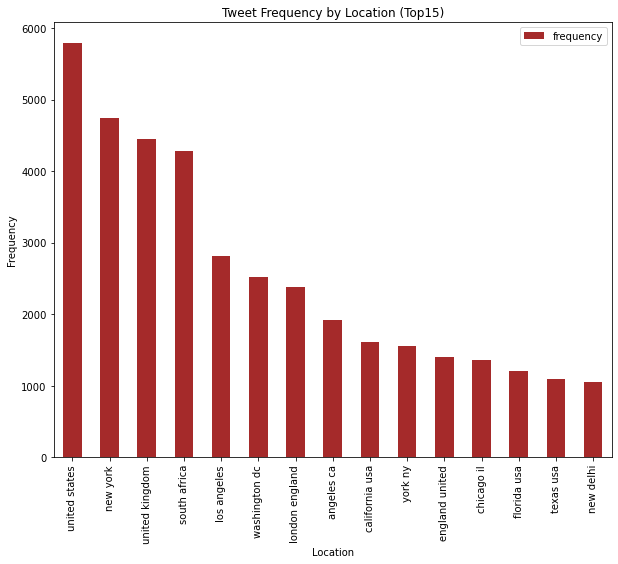

In [368]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)


df_loc_chart = df_loc_final.head(15).rename(columns={"uni/bigram": "Location"}).set_index('Location')
df_loc_chart.plot.bar(color='brown')
plt.title("Tweet Frequency by Location (Top15)")
plt.ylabel("Frequency")
;

In [343]:
df_loc_final.to_csv('gs://msca-bdp-test-1203/location_df_analysis.csv')

### 500K procs

In [234]:
loc_df.to_csv('gs://msca-bdp-test-1203/location_df.csv')

AttributeError: 'DataFrame' object has no attribute 'toPandas'

In [237]:
loc_df.head(15)

,x_user_scrname,x_user_location,clean_loctn,x_user_city,x_user_state,x_user_country
0,RWMaloneMD,"Madison, VA",Madison VA,,va,
2,TheKaranMenon,"Holmdel, NJ",Holmdel NJ,,nj,
3,ChuckCallesto,"Florida, USA",Florida USA,,,usa
4,btsinthemoment,speedy,speedy,,,
8,CBSNews,"New York, NY",New York NY,,ny,
9,Breaking911,Nashville,Nashville,nashville,,
11,haruharu_w_bts,KOR/ENG,KORENG,,,
12,RealCandaceO,"New York, USA",New York USA,,,usa
13,JordanSchachtel,Florida,Florida,,florida,
14,RepSwalwell,"East Bay, CA & DC (CA-15)",East Bay CA DC CA,,dc,


### Test

In [ ]:
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA','HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME','MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM','NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX','UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
countries = ['United States','United Kingdom','Japan','Indonesia','India','Philippines','Brazil','South Korea','China','Mexico','Egypt','Russia','Thailand','Bangladesh','Argentina','Nigeria','Turkey','Pakistan','Congo (Kinshasa)','Vietnam','Iran','France','Peru','Angola','Malaysia','Colombia','Tanzania','Hong Kong','Chile','Saudi Arabia','Iraq','Sudan','Spain','Kenya','Myanmar','Canada','Singapore','Côte dIvoire','Australia','South Africa','Morocco','Afghanistan','Jordan','Germany','Algeria','Bolivia','Ethiopia','Kuwait','Ukraine','Yemen','Guatemala','Italy','North Korea','Taiwan','Ecuador','Madagascar','Dominican Republic','United Arab Emirates','Uzbekistan','Burkina Faso','Cameroon','Ghana','Azerbaijan','Zimbabwe','Cuba','Cambodia','Somalia','Belarus','Mali','Venezuela','Kazakhstan','Syria','Austria','Malawi','Romania','Congo (Brazzaville)','Poland','Belgium','Zambia','Hungary','Guinea','Uganda','Oman','Mongolia','Serbia','New Zealand','Czechia','Uruguay','Bulgaria','Honduras','Mozambique','Qatar','Senegal','Rwanda','Libya','Georgia','Chad','Denmark','Mauritania','Armenia','Tunisia','Kyrgyzstan','Nicaragua','Niger','Liberia','Haiti','Sweden','Nepal','Eritrea','Sierra Leone','Laos','Israel','Central African Republic','Panama','Netherlands','Togo','Gabon','Croatia','Tajikistan','Benin','Sri Lanka','Norway','Greece','Burundi','Finland','Macedonia','Moldova','Latvia','Jamaica','Lithuania','Macau','El Salvador','Djibouti','Ireland','Lebanon','Paraguay','Portugal','Slovakia','Estonia','Switzerland','Albania','Turkmenistan','Guinea Bissau','South Sudan','Lesotho','Cyprus','Puerto Rico','Namibia','Papua New Guinea','Mauritius','Costa Rica','Slovenia','Bosnia And Herzegovina','The Bahamas','Martinique','Equatorial Guinea','Botswana','Suriname','Timor Leste','Guyana','The Gambia','Reunion','Gibraltar','Montenegro','Bahrain','Curaçao ','Guadeloupe','Maldives','French Polynesia','Iceland','Luxembourg','Cabo Verde','Guam','Comoros','Swaziland','Barbados','Bhutan','New Caledonia','Fiji','Solomon Islands','Trinidad And Tobago','Saint Lucia','French Guiana','Belize','Sao Tome And Principe','Kosovo','Bermuda','Vanuatu','Brunei','USA','uk']

In [ ]:
states_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}